<a href="https://colab.research.google.com/github/Luiz-JLP/DataScience-Heart/blob/main/DataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise e Predição sobre Ataques Cardíacos

# Importação do Dataset "Heart Attack Analysis & Prediction Dataset"

Fonte: https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
heart = pd.read_csv('heart.csv')

# Analise inicial do Dataset

In [ ]:
type(heart)

pandas.core.frame.DataFrame

In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
heart.shape

(303, 14)

In [ ]:
heart.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [ ]:
np.isnan(heart.any())

age         False
sex         False
cp          False
trtbps      False
chol        False
fbs         False
restecg     False
thalachh    False
exng        False
oldpeak     False
slp         False
caa         False
thall       False
output      False
dtype: bool

In [ ]:
np.isfinite(heart.all())

age         True
sex         True
cp          True
trtbps      True
chol        True
fbs         True
restecg     True
thalachh    True
exng        True
oldpeak     True
slp         True
caa         True
thall       True
output      True
dtype: bool

In [ ]:
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:

heart.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


# Analisando os dados

In [ ]:
heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
print(f"Maior idade encontrada: {heart['age'].max()} anos")
print(f"Menor idade encontrada: {heart['age'].min()} anos")
print("")
print(f"Média de idade: {heart['age'].mean()} anos")
print(f"Mediana de idade: {heart['age'].median()} anos")
print(f"Desvio padrão: {heart['age'].std()}")
print(f"Assimetria: {heart['age'].skew()}")
print("")
print(f"Média de Idade por Sexo: {heart.groupby('sex')['age'].mean()}")

Maior idade encontrada: 77 anos
Menor idade encontrada: 29 anos

Média de idade: 54.366336633663366 anos
Mediana de idade: 55.0 anos
Desvio padrão: 9.082100989837858
Assimetria: -0.2024633654856539

Média de Idade por Sexo: sex
0    55.677083
1    53.758454
Name: age, dtype: float64


Análise dos valores máximos do nível de colesterol por sexo e idade:

In [ ]:
pd.pivot_table(heart, values = 'chol', index = ['age', 'sex'], aggfunc='max', margins=True)

chol
age sex      
29  1     204
34  0     210
    1     182
35  0     183
    1     282
...       ...
71  0     302
74  0     269
76  0     197
77  1     304
All       564

[74 rows x 1 columns]

Análise dos valores mínimos do nível de colesterol por sexo e idade:

In [ ]:
pd.pivot_table(heart, values = 'chol', index = ['age', 'sex'], aggfunc='min', margins=True)

chol
age sex      
29  1     204
34  0     210
    1     182
35  0     183
    1     192
...       ...
71  0     149
74  0     269
76  0     197
77  1     304
All       126

[74 rows x 1 columns]

# Análise Gráfica dos dados

Analisando a média da pressão arterial por idade:

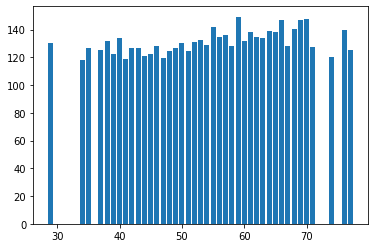

In [ ]:
heart_porsexo = heart.groupby('age').mean().reset_index()
plt.bar(heart_porsexo['age'], heart_porsexo['trtbps'])
plt.show()

Analisando a frequência de cada tipo de dor no peito:

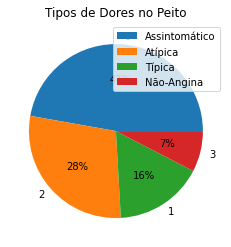

In [ ]:
heart_dor = heart['cp'].value_counts()

plt.pie(heart_dor, labels = heart_dor.index, autopct='%1.i%%')
plt.legend(['Assintomático', 'Atípica', 'Típica', 'Não-Angina'], loc=1)

plt.title('Tipos de Dores no Peito')

plt.show()

Analisando a faixa de idade:

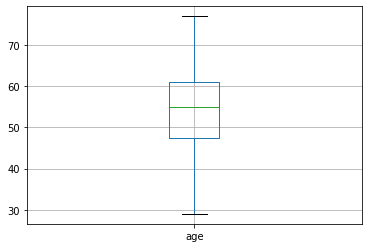

In [ ]:
heart.boxplot(column='age')
plt.show()

Analisando a quantidade de amostras por idade:

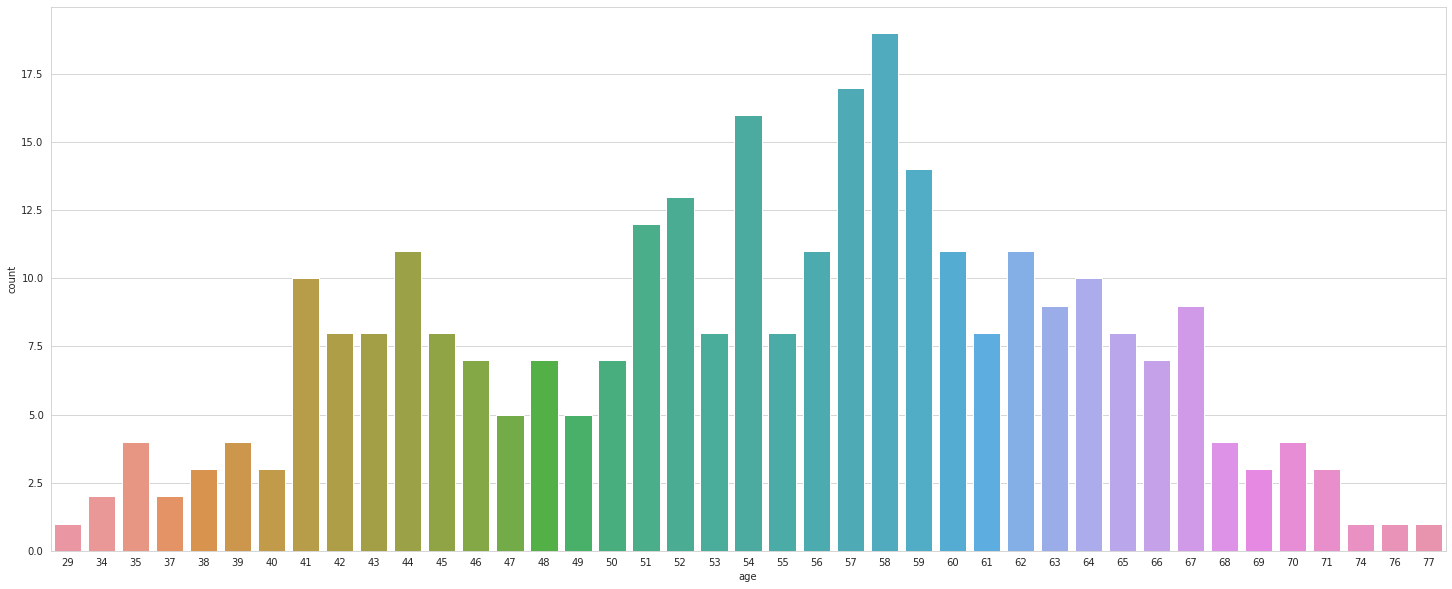

In [ ]:
plt.figure(figsize=(25,10))
sns.set_style('whitegrid')
sns.countplot(x='age',data=heart)

Analisando a pressão sanguínia

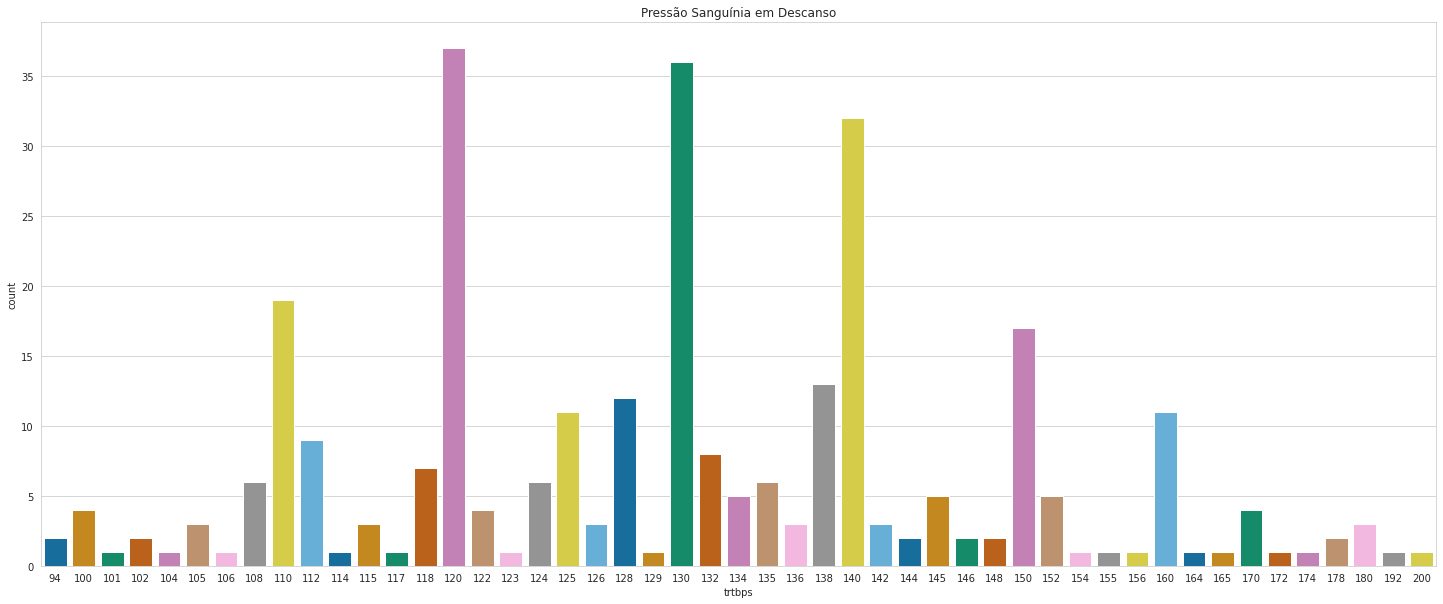

In [ ]:
plt.figure(figsize=(25,10))
sns.countplot(x = 'trtbps', data = heart, palette = 'colorblind')
plt.title('Pressão Sanguínia em Descanso')
plt.show()

Analisando os níveis de Colesterol

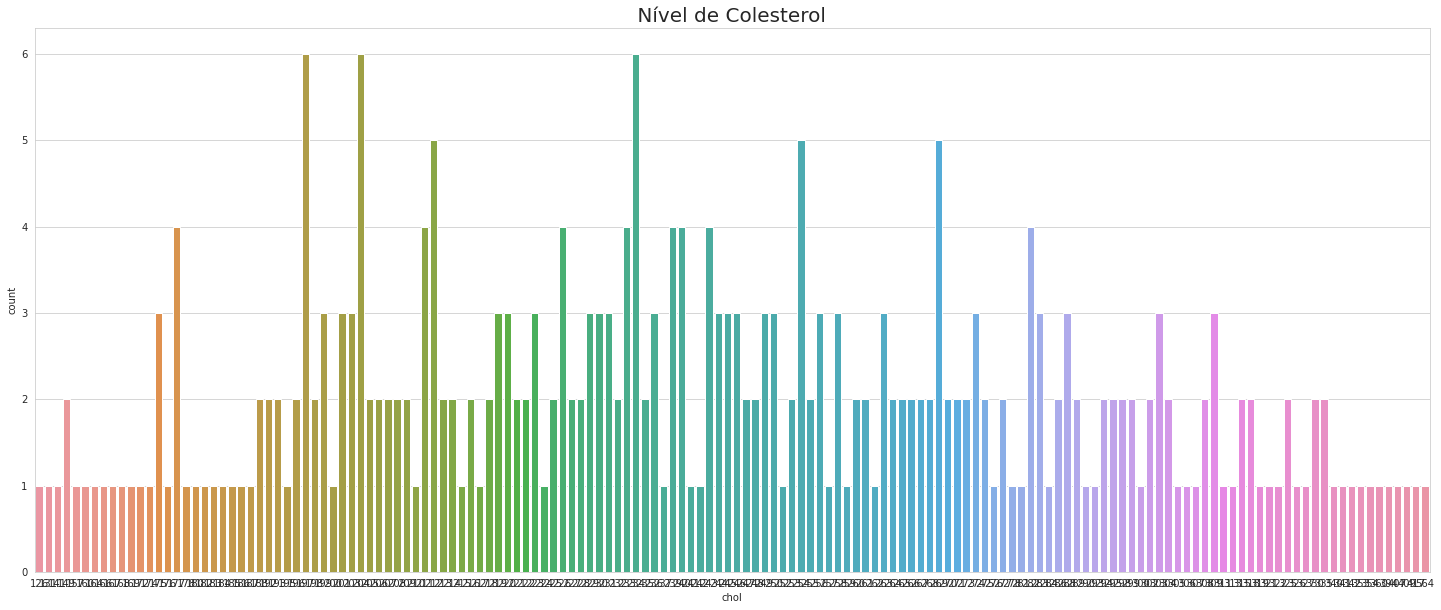

In [ ]:
plt.figure(figsize=(25,10))
plt.title(" Nível de Colesterol ",fontsize=20)
sns.countplot(x='chol',data=heart)

# Realizando o Machine Learning

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

In [7]:
X = heart.drop(columns=['output'], axis=1)
y = heart['output']


Definindo as variáveis de treino e de teste


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 228)

In [9]:
print(f"Tamanho de X_train: {X_train.shape}")
print(f"Tamanho de X_test: {X_test.shape}")
print(f"Tamanho de y_train: {y_train.shape}")
print(f"Tamanho de y_test: {y_test.shape}")

Tamanho de X_train: (242, 13)
Tamanho de X_test: (61, 13)
Tamanho de y_train: (242,)
Tamanho de y_test: (61,)


Criando o classificador e treinando o modelo

In [10]:
classificador = SGDClassifier(loss='log', learning_rate='constant', max_iter=10,
                   eta0=0.0001, verbose=1, tol=None, random_state=123)

In [11]:
classificador.fit(X_train, y_train)

-- Epoch 1
Norm: 0.10, NNZs: 13, Bias: 0.000129, T: 242, Avg. loss: 2.022874
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.12, NNZs: 13, Bias: -0.000162, T: 484, Avg. loss: 2.073574
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.14, NNZs: 13, Bias: -0.000213, T: 726, Avg. loss: 2.384979
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.16, NNZs: 13, Bias: -0.000381, T: 968, Avg. loss: 2.039492
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.17, NNZs: 13, Bias: -0.000487, T: 1210, Avg. loss: 2.257410
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.17, NNZs: 13, Bias: -0.000548, T: 1452, Avg. loss: 2.113238
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 0.18, NNZs: 13, Bias: -0.000590, T: 1694, Avg. loss: 2.004713
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 0.18, NNZs: 13, Bias: -0.000656, T: 1936, Avg. loss: 2.030938
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 0.19, NNZs: 13, Bias: -0.000737, T: 2178, Avg. loss: 2.326015
Total training

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=10, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=123, shuffle=True,
              tol=None, validation_fraction=0.1, verbose=1, warm_start=False)

Testando a Acurácia do Modelo

In [13]:
from sklearn.metrics import accuracy_score

y_train_true = y_train
y_train_pred = classificador.predict(X_train)
y_test_true = y_test
y_test_pred = classificador.predict(X_test)


print(f"Acurácia de Treino: {round(accuracy_score(y_train_true, y_train_pred), 2)}")
print(f"Acurácia de Teste: {round(accuracy_score(y_test_true, y_test_pred), 2)}")

Acurácia de Treino: 0.69
Acurácia de Teste: 0.75


In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = classificador.predict(X_test)

print(f"Acurácia de Teste: ±{mean_absolute_error(y_test, y_pred):1.0f}")

Acurácia de Teste: ±0


Efeito da Taxa de Aprendizagem

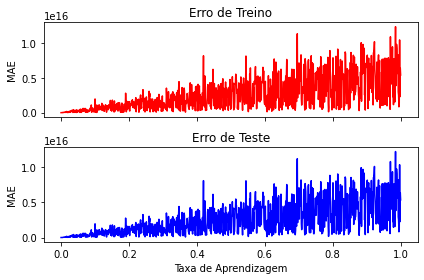

In [20]:
from sklearn.linear_model import SGDRegressor

regressor = SGDRegressor(loss='squared_loss',
                   learning_rate='constant',
                   max_iter=10,
                   eta0=0.01,
                   verbose=1,
                   tol=None,
                   random_state=123)

regressor = SGDRegressor()

mae_train_values = []
mae_test_values = []

x_axis = np.linspace(1e-6, 1, 1000)

for i in x_axis:
    regressor =  regressor.set_params(eta0=i)
    regressor.fit(X_train, y_train)
    
    y_train_pred = regressor.predict(X_train)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_train_values.append(mae_train)
    
    y_test_pred = regressor.predict(X_test)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    mae_test_values.append(mae_test)
    
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(x_axis, mae_train_values, color='red')
axes[1].plot(x_axis, mae_test_values, color='blue')
axes[0].set_title('Erro de Treino')
axes[1].set_title('Erro de Teste')
axes[1].set_xlabel('Taxa de Aprendizagem')
axes[0].set_ylabel('MAE')
axes[1].set_ylabel('MAE')
plt.tight_layout()
plt.show()